# Assignment 2
JJordan

In [55]:
#load libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#constants
g = 9.81 #m/s^2, gravitational acceleration on Earth

## The Falling Sphere

In [57]:
#load drop data
drop_data = np.loadtxt(r"C:\Users\jjord\OneDrive\Documents\GitHub\Phys345_Labs\drop_data.csv", delimiter=',', skiprows=1)

###### Q1.1
Parameter 'skiprow' deletes the header row of the data table.

In [58]:
# model A, idealized falling object
#t for time in s
def ideal(t):
    v = g*t
    return v

In [59]:
# model B, real falling object (including air resistance)
#t for time in s
#v_t for terminal velocity in m/s, default 40 m/s
def real(t, v_t=40):
    v = v_t * ( 1 - math.e**(-g*t/v_t) )
    return v

#### Plots of Falling Objects, Velocity versus Time

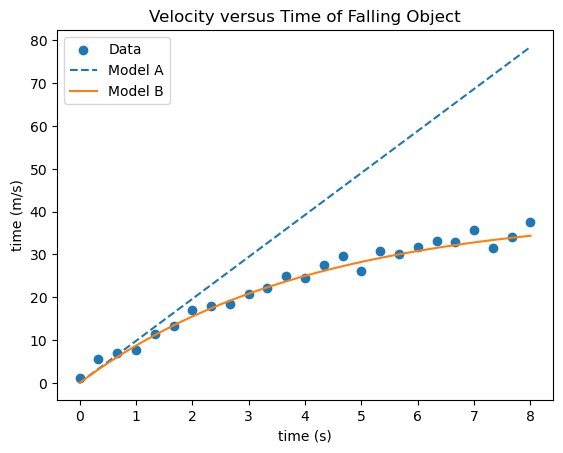

In [127]:
# plot of experimental data
#assign values of independent variable to list
t = []
for i, times in enumerate(drop_data):
    t.append(times[0])

#assign values of dependent variable to list
v = []
for j, velc in enumerate(drop_data):
    v.append(velc[1])

#convert lists to array
tarr = np.array(t)
varr = np.array(v)

#create scatter plot from corresponding array values
plt.scatter(tarr, varr, label='Data')


# plot of idealized model A
t_id = np.linspace(0, 8, 100)
v_id = ideal(t_id)

plt.plot(t_id, v_id, linestyle='dashed', label='Model A')

# plot of real model B
t_re = np.linspace(0, 8, 100)
v_re = real(t_re)

plt.plot(t_re, v_re, label='Model B')

# plot labels
plt.title('Velocity versus Time of Falling Object')
plt.xlabel('time (s)')
plt.ylabel('time (m/s)')
plt.legend()

# display plot
plt.show()

#### Drop Data Questions
###### Q1.3
Model A becomes siginicantly less reliable after 2 seconds. It values being greater than the data suggest it does not account for the slowing effect of air resistance.

## Parameter Sweeping


In [ ]:
# model of falling object with air resistance
def plot_model_comparison(t_data, v_data, v_term_guess):
    v_data = v_term_guess * ( 1 - math.e**(-g*t_data/v_term_guess) )
    return v_data

9.99945100153201

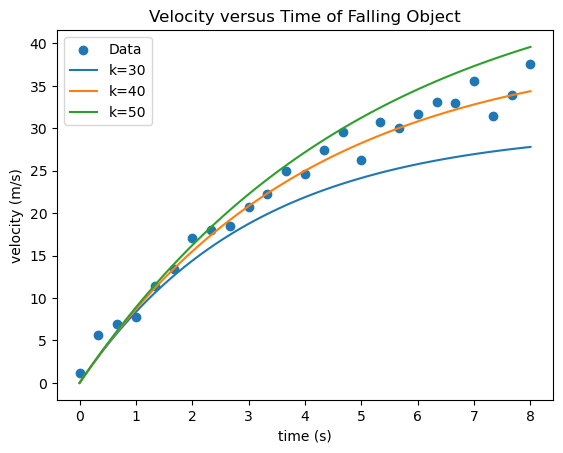

In [ ]:
# plot experimental data
plt.scatter(tarr, varr, label='Data')

# create plot with model for three values of k: 30, 40, 50
for i in range(3,6):
    t_p = np.linspace(0, 8, 100)
    v_p = plot_model_comparison(t_p,0,i*10)
    plt.plot(t_p, v_p, label=f'k={i*10}')

# plot labels
plt.title('Velocity versus Time of Falling Object')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()

# display plot
plt.show()

###### Q2.4
The terminal velocity of 40 best models experimental data. As terminal velocity increases, the plot becomes steeper.

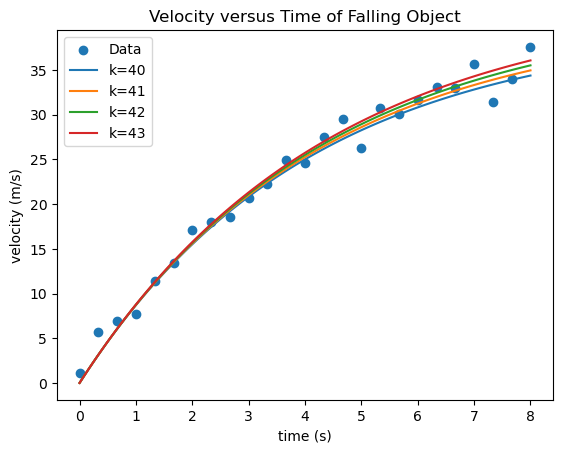

In [ ]:
# further test
plt.scatter(tarr, varr, label='Data')

for i in range(42,43):
    t_p = np.linspace(0, 8, 100)
    v_p = plot_model_comparison(t_p,0,i)
    plt.plot(t_p, v_p, label=f'k={i}')

# plot labels
plt.title('Velocity versus Time of Falling Object')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()

# display plot
plt.show()

###### Q2.5
A terminal velocity of 41 to 43 is also a decent approximation to the experimental data. This reasonable since it is still close to 40, but as far of as 30 or 50, .

## Hooke's Law

In [117]:
# load spring data
spring_data = np.loadtxt(r"C:\Users\jjord\OneDrive\Documents\GitHub\Phys345_Labs\spring_data.csv", delimiter=',', skiprows=1)

In [118]:
# model of spring
#m for mass in kg
#k for spring constant in N/m
def spring_model(m, k):
    x = g/k * m
    return x


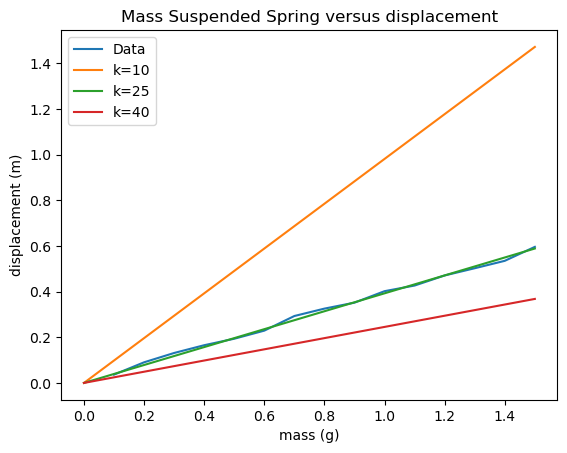

In [119]:
# plot spring data

m_e = []
x_e = []

#assign values of masses to list
for i, masses in enumerate(spring_data):
    m_e.append(masses[0])

#assign values of displacement to list
for j, displc in enumerate(spring_data):
    x_e.append(displc[1])

#convert lists to arrays
marr = np.array(m_e)
darr = np.array(x_e)

plt.plot(marr, darr, label='Data')

# plot spring model
#create plot for three values of k: 10, 25, 40
for i in range(10,41,15):
    m_p = np.linspace(0, 1.5, 10)
    x_p = spring_model(m_p, i)
    plt.plot(m_p, x_p, label=f'k={i}')

#label plot
plt.title('Mass Suspended Spring versus displacement')
plt.xlabel('mass (g)')
plt.ylabel('displacement (m)') 
plt.legend()

#display plot
plt.show()

###### Q3.2
For k=30, plot of spring model is most fit to data.

In [120]:
# calculating residual and mean squared error for k=25, line of best fit
square_sum = 0

for i, masses in enumerate(m_e):
    model_x = spring_model(m_e[i], 25)
    R = x_e[i] - model_x
    print(f'the residual for a {round(m_e[i], 2)} mass is {round(R, 4)}')
    square_sum = R**2 + square_sum

R2_25 = square_sum/len(m_e)
print(f'for k=25, the mean squared error R^2 is {round(R2_25, 10)}')


the residual for a 0.1 mass is -0.0029
the residual for a 0.2 mass is 0.0118
the residual for a 0.3 mass is 0.0134
the residual for a 0.4 mass is 0.0082
the residual for a 0.5 mass is -0.0027
the residual for a 0.6 mass is -0.0064
the residual for a 0.7 mass is 0.0184
the residual for a 0.8 mass is 0.0115
the residual for a 0.9 mass is -0.0016
the residual for a 1.0 mass is 0.0094
the residual for a 1.1 mass is -0.0052
the residual for a 1.2 mass is -0.0003
the residual for a 1.3 mass is -0.0078
the residual for a 1.4 mass is -0.0146
the residual for a 1.5 mass is 0.0073
for k=25, the mean squared error R^2 is 9.05308e-05


In [121]:
# calculating residual and mean squared error for k=10
square_sum = 0

for i, masses in enumerate(m_e):
    model_x = spring_model(m_e[i], 10)
    R = x_e[i] - model_x
    square_sum = R**2 + square_sum

R2_25 = square_sum/len(m_e)
print(f'for k=10, the mean squared error R^2 is {round(R2_25, 10)}')


for k=10, the mean squared error R^2 is 0.2858270664


In [122]:
# calculating residual and mean squared error for k=40
square_sum = 0

for i, masses in enumerate(m_e):
    model_x = spring_model(m_e[i], 40)
    R = x_e[i] - model_x
    square_sum = R**2 + square_sum

R2_25 = square_sum/len(m_e)
print(f'for k=40, the mean squared error R^2 is {round(R2_25, 10)}')


for k=40, the mean squared error R^2 is 0.0181559699


###### Q3.4
As value of spring constant increases, the model line becomes steeper. The mean squared error increases as spring constant deviates from k=25, the best value.